In [16]:
import pandas as pd
import scipy.stats
from sklearn import preprocessing

In [2]:
def kNN_step_down(train, fit, calls, drug, k):
    correlation = sample_correlation(train, fit)
    counter = 0
    yes, no = 0, 0
    drug_list = ['Everolimus(mTOR)', 'Disulfiram(ALDH2)', 'Methylglyoxol(Pyruvate)', 'Mebendazole(Tubulin)', '4-HC(DNA alkylator)']
    while (yes + no) < k:
        val = calls.loc[drug_list[drug], correlation.index[counter]]
        if val == 0.0:
            no += 1
        if val == 1.0:
            yes += 1
        counter += 1
    true_call = calls.loc[drug_list[drug], fit.name]
    return(yes, true_call)

In [3]:
def kNN_weighted(train, fit, calls, drug, k):
    correlation = sample_correlation(train, fit)
    drug_list = ['Everolimus(mTOR)', 'Disulfiram(ALDH2)', 'Methylglyoxol(Pyruvate)', 'Mebendazole(Tubulin)', '4-HC(DNA alkylator)']
    counter = 0
    yes, no = 0, 0
    score = 0
    while (yes + no) < k:
        val = calls.loc[drug_list[drug], correlation.index[counter]]
        if val == 0.0:
            no += 1
            score += (correlation[counter]*-1)
        if val == 1.0:
            yes += 1
            score += (correlation[counter]*1)
        counter += 1
    true_call = calls.loc[drug_list[drug], fit.name]
    return(score, true_call)

In [4]:
def sample_correlation(train, fit):
    append_list = []
    for sample in list(train):
        cor = scipy.stats.pearsonr(train[sample], fit)
        append_list.append(cor[0])
    correlation = pd.Series(index = list(train), data = append_list)
    correlation = correlation.replace(to_replace = 1, value = 0)
    correlation = correlation.sort_values(ascending = False)
    return(correlation)

In [5]:
def plot_roc(ranks):
    ranks = ranks.sort_values(ascending = False, by = 'sensitive neighbors')
    hinge = max(ranks['sensitive neighbors']+1)
    return_frame = pd.DataFrame(columns = ['x', 'y'])
    x_list, y_list = [], []
    y_list.append(0)
    x_list.append(0)
    for num in ranks['sensitive neighbors']:
        if num != hinge:
            TP, TN, FN, FP = 0,0,0,0
            for index, row in ranks.iterrows():
                if row['sensitive neighbors'] >= num:
                    if row['call'] == 1.0:
                        TP += 1
                    elif row['call'] == 0.0:
                        FP += 1
                else:
                    if row['call'] == 1.0:
                        FN += 1
                    elif row['call'] == 0.0:
                        TN += 1
            hinge = num
            y = (TP/(TP+FN))
            x = (FP/(TN+FP))
            y_list.append(y)
            x_list.append(x)
    y_list.append(1)
    x_list.append(1)
    return_frame['x'] = x_list
    return_frame['y'] = y_list
    return(return_frame)

In [6]:
data = pd.read_csv('/Users/MacProMatt/Desktop/algorithms-school_work/CSCI 5461/HW2/DREAM_data.txt', sep='\t')
expression_profiles = data.iloc[5:]
expression_profiles = expression_profiles.set_index(expression_profiles['HGNC_ID'])
expression_profiles = expression_profiles.drop('HGNC_ID', axis = 1)
calls = data.iloc[:5]
calls = calls.set_index(calls['HGNC_ID'])
calls = calls.drop('HGNC_ID', axis = 1)
x_rand, y_rand = [0,1], [0,1]
rand_df = pd.DataFrame(columns = ['x', 'y'])
rand_df['x'] = x_rand
rand_df['y'] = y_rand
frame = pd.DataFrame(index = list(expression_profiles), columns= ['sensitive neighbors', 'call'])
for sample in expression_profiles:
    num_yes, true_call = kNN_step_down(expression_profiles, expression_profiles[sample], calls, 4, 5)
    frame.loc[sample] = num_yes, true_call
plot_data = plot_roc(frame)

for sample in expression_profiles:
    num_yes, true_call = kNN_weighted(expression_profiles, expression_profiles[sample], calls, 4, 5)
    frame.loc[sample] = num_yes, true_call
plot_data_weight = plot_roc(frame)

In [20]:
expression_transformed = expression_profiles.apply(preprocessing.LabelEncoder().fit_transform)


,184B5,600MPE,AU565,BT20,BT474,BT483,CAMA1,HCC38,HCC70,HCC202,...,SUM185PE,SUM225CWN,SUM1315MO2,T47D,UACC812,ZR751,ZR7530,ZR75B,BT549,MCF10A
HGNC_ID,,,,,,,,,,,,,,,,,,,,,
C9orf152,1206,16530,15022,726,17385,9046,13428,482,4774,14535,...,16846,13823,167,15030,9755,17854,14635,17421,809,624
ELMO2,12708,15191,15420,15561,15541,17354,14142,16623,14470,12353,...,17909,15774,14352,15472,15787,16175,17143,14939,16373,13223
RPS11,18450,18261,18157,18299,17923,17959,18210,18221,17999,18318,...,17491,18119,17946,17185,17593,17881,17986,18308,18100,18251
CREB3L1,6468,18209,7398,5054,15625,9704,10091,11847,5822,12780,...,18235,15698,14040,5942,15934,13157,17502,11999,15109,5654
PNMA1,14450,14143,14444,14376,16237,15454,13794,15014,13368,14996,...,15322,13492,17128,16237,16547,11798,14328,13071,16574,14341
MMP2,4902,3933,4300,4179,3906,3469,3863,13423,7185,4597,...,3989,5074,18075,4020,5234,4663,6042,3731,4880,7762
C10orf90,2271,1721,1896,2202,1658,1456,1733,3441,3069,2999,...,1290,2024,8206,1440,2613,1702,2690,1583,1331,2775
ERCC5,12924,13482,12597,14345,10158,11106,11563,11247,13198,9475,...,11063,15171,8997,13134,6490,13652,11639,14006,13031,13176
ZHX3,7089,5580,6634,7527,4747,7128,7407,8258,5112,5414,...,7067,5248,9723,7065,6335,5558,6786,6662,6697,6657


[Text(0,0.5,'Sensitivity'), Text(0.5,0,'1 - Specificity')]

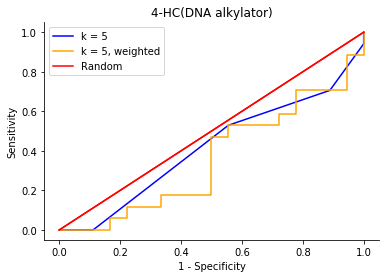

In [13]:
x = plot_data.plot.line(x = 'x', y = 'y', title = '4-HC(DNA alkylator)', legend = False, color = "blue")
x.spines['top'].set_visible(False)
x.spines['right'].set_visible(False)
plot_data_weight.plot(x = 'x', y = 'y', ax = x, legend = False, color = "orange")
rand_df.plot(ax = x, legend = False, color = "red")
x.legend(['k = 5', 'k = 5, weighted', 'Random'])
x.set(xlabel="1 - Specificity", ylabel="Sensitivity")